In [9]:
import pandas as pd
dados = pd.read_csv('../dados/dados_experimentos.zip', compression = 'zip')
dados
dados_resultados = pd.read_csv('../dados/dados_resultados.csv')
n_moa = dados_resultados.sum(axis='columns', numeric_only=True)
dados_resultados['n_moa'] = n_moa
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0
dados_totais = pd.merge(dados,dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_totais

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,False
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True


# Desafios
### Desafio 01: Encontrar um top 10 das acões do MOA
### Desafio 02: ler o artigo sobre join, merge e concat do pandas
### Desafio 03: Criar a coluna eh_controle para quando na linha tratamento == com_controle
### Desafio 04: Criar três coluna para indicar o tempo 24, 48, 72
### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para compara distribuições
### Desafio 06: Descobrir se algum composto que dependendo da configuração do tempo experimento, ativa ou não algum MOA
### Desafio 07: Descobrir se algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

## Desafio 01


In [10]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [11]:
sum_agentes = dados_resultados.drop(['id','n_moa','ativo_moa'], axis='columns')
new_columns = {}
for c in sum_agentes.columns:
    new_columns[c] = c.split('_')[-1]
sum_agentes.rename(new_columns, axis='columns', inplace=True)
sum_agentes = pd.DataFrame(sum_agentes.sum())
sum_agentes['moa'] = sum_agentes.index
sum_agentes.groupby(by='moa').sum()[0].sort_values(ascending=False)[:10]

moa
inhibitor            9693
antagonist           3449
agonist              2330
blocker               323
agent                 150
activator             115
local                  80
antioxidant            73
anti-inflammatory      73
immunosuppressant      73
Name: 0, dtype: int64

## Desafio 03

In [12]:
dados_totais['is_controle'] = dados_totais['tratamento'] == 'com_controle'
dados_totais.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,is_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


## desafio 05:

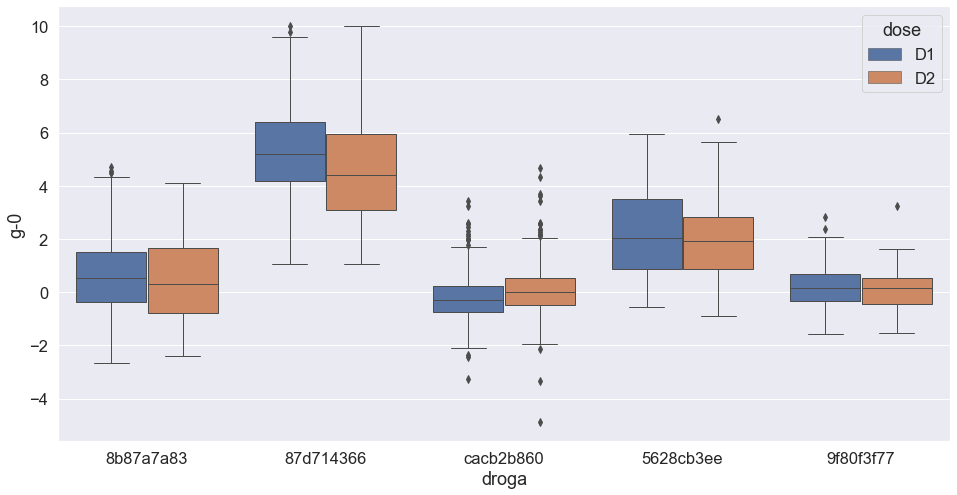

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
cod_compostos = dados['droga'].value_counts().index[:5]
cod_compostos

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=dados_totais.query('droga in @cod_compostos'), y='g-0', x='droga', hue='dose', linewidth= 1)
plt.show()

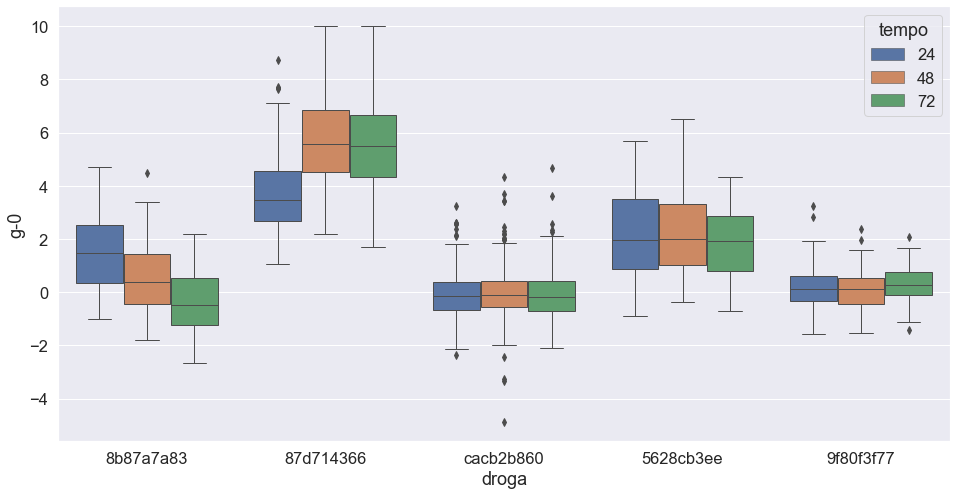

In [14]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=dados_totais.query('droga in @cod_compostos'), y='g-0', x='droga', hue='tempo', linewidth= 1)
plt.show()

## Desafio 06

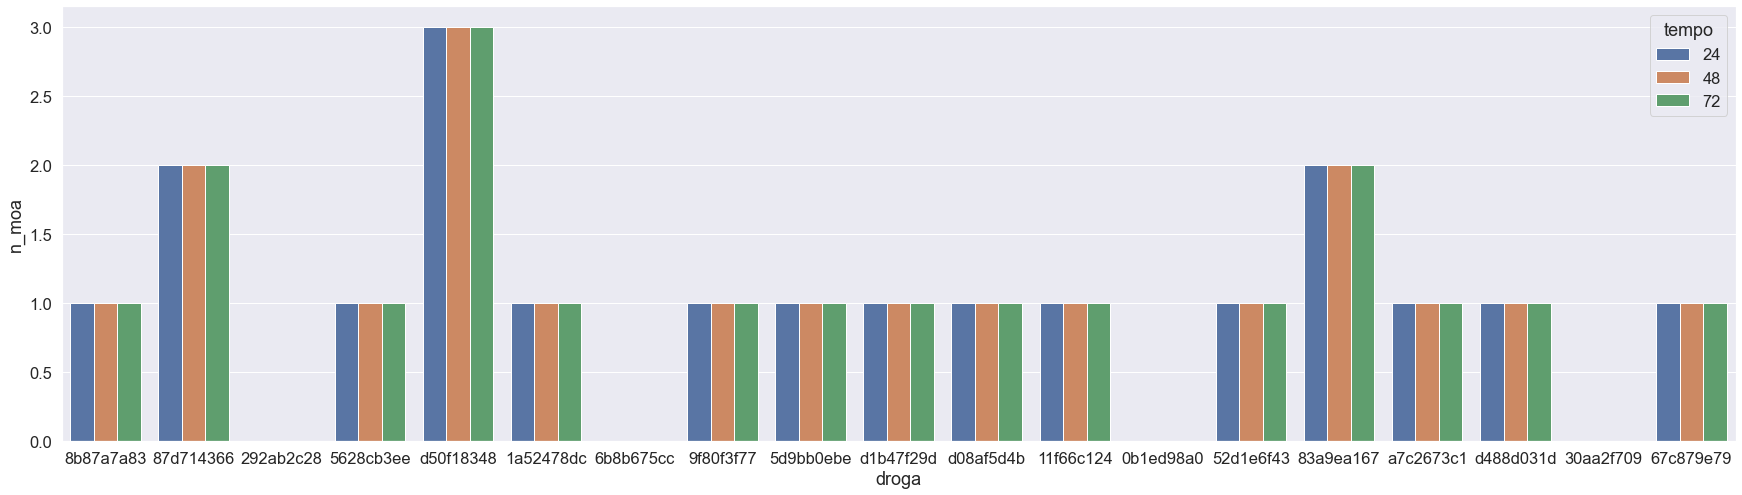

In [15]:
cod_compostos = dados['droga'].value_counts().index[:20]
cod_compostos

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(30,8))
ax = sns.barplot(data=dados_totais.query('droga in @cod_compostos and tratamento != "com_controle"'), x='droga', y='n_moa', hue='tempo', linewidth= 1)
plt.show()

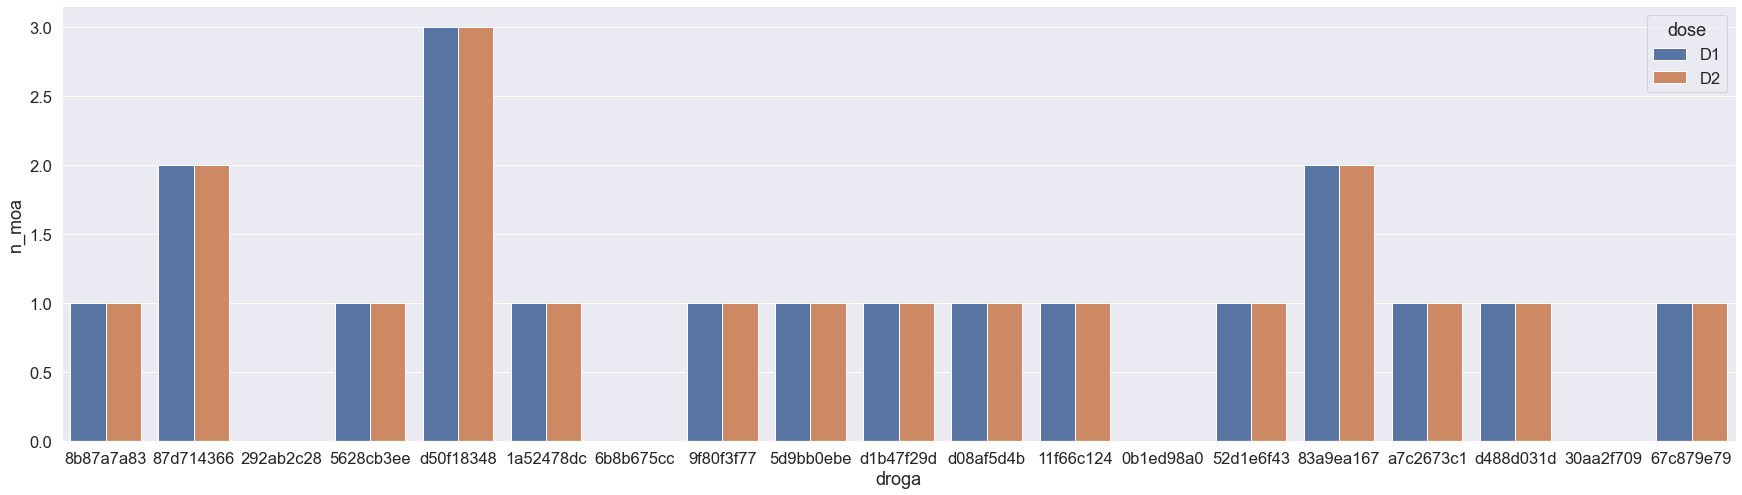

In [16]:
cod_compostos = dados['droga'].value_counts().index[:20]
cod_compostos

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(30,8))
ax = sns.barplot(data=dados_totais.query('droga in @cod_compostos and tratamento != "com_controle"'), x='droga', y='n_moa', hue='dose', linewidth= 1)
plt.show()

## Desafio 04


In [17]:
#dados_totais['is_24'] = dados_totais['tempo'] == 24
#dados_totais['is_48'] = dados_totais['tempo'] == 48
#dados_totais['is_72'] = dados_totais['tempo']
dados_totais = pd.get_dummies(data=dados_totais, columns=['tempo'])